In [55]:
import numpy as np
import copy as cp
import matplotlib as mt
import matplotlib.pyplot as plt
import pyemma.plots as mplt
import sys
from tqdm import tqdm
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import scipy as sc
import scipy.optimize as sco

In [56]:
sys.path.append('../../0_python_modules/')

In [57]:
import navjeet_hist as nh
import extras
import metrics as mtr

In [4]:
randoms = np.loadtxt('../../1_datasets/randoms.txt', dtype=int)

In [5]:
fsupervised = []
isupervised = []
for i in range(len(randoms)):
    fimp = np.load(f'../../2_jctc_urf/saved_supervised/fimp_supervised_{i}.npy')
    fsupervised.append( fimp )
    isupervised.append(fimp.argsort()[::-1])
fsupervised = np.array(fsupervised)
isupervised = np.array(isupervised)

In [6]:
fpermute = []
ipermute = []
for h in range(2,11):
    ff = []
    ii=[]
    for i in range(len(randoms)):
        fimp = np.load(f'../../2_jctc_urf/saved_furf/fimp_hlabel{h}_{i}.npy')
        ff.append( fimp )
        ii.append(fimp.argsort()[::-1])
    fpermute.append(ff)
    ipermute.append(ii)
fpermute = np.array(fpermute)
ipermute = np.array(ipermute)

In [7]:
frandom = []
irandom = []
for i in randoms:
    np.random.seed(i)
    ff = np.random.random(size=fsupervised.shape[1])
    ff = ff/ff.sum()
    frandom.append(ff)
    irandom.append(ff.argsort()[::-1])
frandom = np.array(frandom)
irandom = np.array(irandom)

In [8]:
fsame = np.zeros((9,fsupervised.shape[-1],2)) # n_features common in permute to supervised
wpsame = np.zeros((9,fsupervised.shape[-1],2)) # cum fimp of common wrt permute
wssame = np.zeros((9,fsupervised.shape[-1],2)) # cum fimp of common wrt supervised
for h in range(2,11):
    for f in range(1,fsupervised.shape[-1]+1):
        ss = []
        wp = []
        ws = []
        for i in range(len(randoms)):
            fp = ipermute[h-2,i][:f]
            for j in range(len(randoms)):
                fs = isupervised[j][:f]
                cc = np.intersect1d(fp,fs)
                ss.append(cc.shape[0])
                wp.append( fpermute[h-2,i][cc].sum() / fpermute[h-2,i][fp].sum() )
                ws.append( fsupervised[j][cc].sum() / fsupervised[j][fs].sum() )
        fsame[h-2,f-1] = [np.mean(ss), np.std(ss)]
        wpsame[h-2,f-1] = [np.mean(wp), np.std(wp)]
        wssame[h-2,f-1] = [np.mean(ws), np.std(ws)]
        


In [9]:
rsame_sup = np.zeros(( fsupervised.shape[-1], 2 )) # n_features common in random to supervised
rssame = np.zeros(( fsupervised.shape[-1], 2 )) # cum fimp of common wrt supervised

for f in range(1, fsupervised.shape[-1]+1):
    ss=[]
    ws=[]
    
    for i in range(len(randoms)):
        fr = irandom[i][:f]
        for j in range(len(randoms)):
            fs = isupervised[j][:f]
            
            cc = np.intersect1d(fr, fs)
            ss.append(cc.shape[0])
            ws.append( fsupervised[j][cc].sum() / fsupervised[j][fs].sum() )
            
    rsame_sup[f-1] = [np.mean(ss), np.std(ss)]
    rssame[f-1] = [np.mean(ws), np.std(ws)]


In [37]:
rsame_permute = np.zeros(( 9, fsupervised.shape[-1], 2 )) # n_features common in random to permute
rpsame = np.zeros(( 9, fsupervised.shape[-1], 2 )) # cum fimp of common wrt permute

for h in range(2,11):

    for f in range(1, fsupervised.shape[-1]+1):
        ss=[]
        wp=[]

        for i in range(len(randoms)):
            fr = irandom[i][:f]
            for j in range(len(randoms)):
                fp = ipermute[h-2,j][:f]

                cc = np.intersect1d(fr, fp)
                ss.append(cc.shape[0])
                wp.append(fpermute[h-2,i][cc].sum() / fpermute[h-2,i][fp].sum())

        rsame_permute[h-2,f-1] = [np.mean(ss), np.std(ss)]
        rpsame[h-2,f-1] = [np.mean(wp), np.std(wp)]


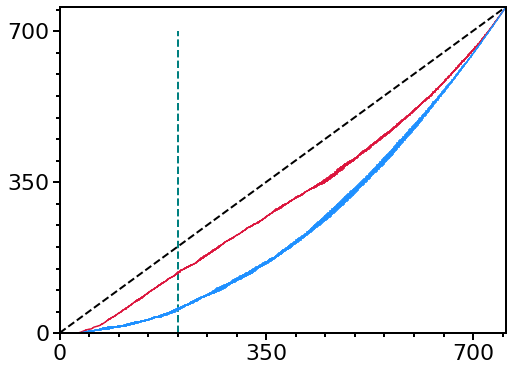

In [96]:
h=2
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(range(1,756), ls='--', c='black', lw=2)
ax.plot([200,200],[0,700], lw=2, ls='--', c='teal')
ax.errorbar(range(1,756), fsame[h-2][:,0], yerr=fsame[h-2][:,1], c='crimson')
ax.errorbar(range(1,756), rsame_sup[:,0], yerr=rsame_sup[:,1], c='dodgerblue')
#
ax.set_xlim(0,756)
ax.set_ylim(0,756)
ax.set_yticks([0,350,700])
ax.set_xticks([0,350,700])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(7))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/nfeatures.pdf')
plt.show()

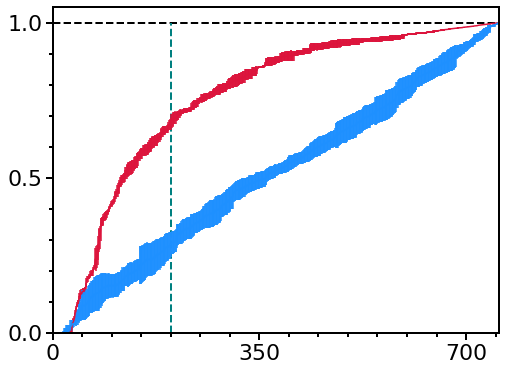

In [105]:
h=2
fig,ax=plt.subplots(figsize=(8,6))
ax.plot([1,755],[1,1], ls='--', c='black', lw=2)
ax.plot([200,200],[0,1], lw=2, ls='--', c='teal')
ax.errorbar(range(1,756), wssame[h-2][:,0], yerr=wssame[h-2][:,1], c='crimson')
ax.errorbar(range(1,756), rssame[:,0], yerr=rssame[:,1], c='dodgerblue')
#
ax.set_xlim(0,756)
ax.set_ylim(0,1.05)
ax.set_yticks([0,0.5,1])
ax.set_xticks([0,350,700])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/csupervised.pdf')
plt.show()

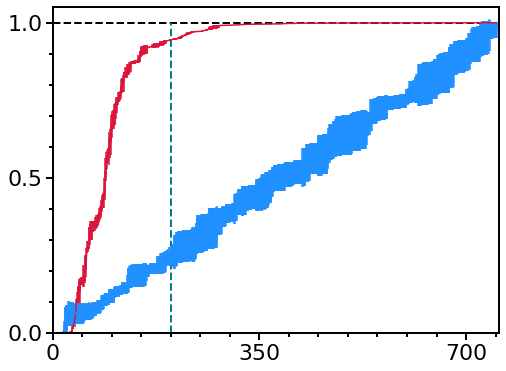

In [108]:
h=2
fig,ax=plt.subplots(figsize=(8,6))
ax.plot([1,755],[1,1], ls='--', c='black', lw=2)
ax.plot([200,200],[0,1], lw=2, ls='--', c='teal')
ax.errorbar(range(1,756), wpsame[h-2][:,0], yerr=wpsame[h-2][:,1], c='crimson')
ax.errorbar(range(1,756), rpsame[h-2][:,0], yerr=rpsame[h-2][:,1], c='dodgerblue')

ax.set_xlim(0,756)
ax.set_ylim(0,1.05)
ax.set_yticks([0,0.5,1])
ax.set_xticks([0,350,700])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/cpermute.pdf')
plt.show()

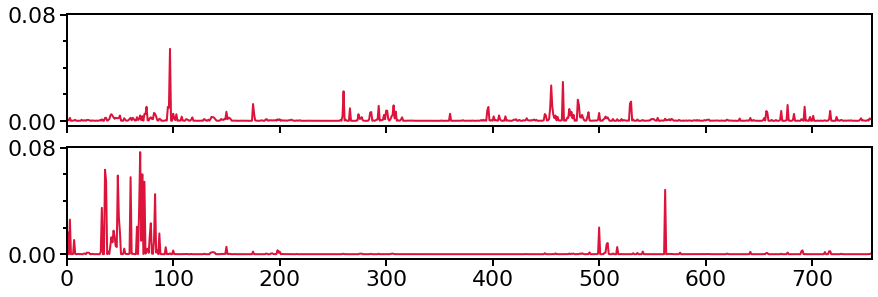

In [111]:
fig,ax=plt.subplots(2,1,figsize=(12,4), sharex=True, sharey=True)
plt.tight_layout()
h=2
ax[0].plot(range(1,756), np.mean(fsupervised, axis=0), lw=2, c='crimson')
ax[1].plot(range(1,756), np.mean(fpermute[h-2], axis=0), lw=2, c='crimson')
ax[0].set_xlim(0,756)
ax[0].set_yticks([0,0.08])
for i in range(2):
    ax[i].spines[:].set_linewidth(2)
    ax[i].tick_params(labelsize=22, length=7, width=2)
    ax[i].axes.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax[i].tick_params(length=4, width=2, which='minor')
plt.savefig('plots/fimp.pdf')

In [67]:
wpsame[:,200]

array([[0.94501089, 0.00200483],
       [0.94511504, 0.00231868],
       [0.945327  , 0.00188248],
       [0.94583334, 0.00162212],
       [0.94566964, 0.00160992],
       [0.94541511, 0.00163988],
       [0.94523185, 0.00195916],
       [0.94476894, 0.00197429],
       [0.94476766, 0.00214755]])

In [68]:
wssame[:,200]

array([[0.68244092, 0.02231628],
       [0.671686  , 0.00879212],
       [0.67685755, 0.01204429],
       [0.6777177 , 0.01558336],
       [0.67382775, 0.01106364],
       [0.67166336, 0.01782351],
       [0.67999542, 0.01813772],
       [0.67378666, 0.01696377],
       [0.67636286, 0.01154734]])

In [118]:
rssame[200]

array([0.29149754, 0.03613872])

In [113]:
rsame_sup[200]

array([56.88      ,  3.32649966])

In [115]:
fsame[:,200]

array([[141.04      ,   2.34059821],
       [140.16      ,   1.66565303],
       [140.76      ,   1.44996552],
       [140.76      ,   2.58116253],
       [139.96      ,   2.02938414],
       [139.44      ,   2.33375234],
       [141.96      ,   1.45547243],
       [141.4       ,   1.64924225],
       [141.76      ,   1.06883114]])

In [14]:
cpairs = np.loadtxt('../../1_datasets/t4l/contact_pairs.txt', dtype=int)

In [53]:
features = np.load('../../2_jctc_urf/traj_specific_data/features_0.npy')

In [56]:
labels = np.loadtxt('../../2_jctc_urf/traj_specific_data/distances0.xvg', comments=['@','#'], usecols=[3])
labels[np.where(labels<0.6)[0]] = 0
labels[np.where(labels != 0)[0]] = 1

In [17]:
wtrunc_same = np.zeros((9,2))
for h in range(2,11):

    wp = []
    
    for i in range(len(randoms)):
        f = fpermute[h-2,i]
        f = np.cumsum(f[f.argsort()[::-1]])
        f = np.gradient(f)
        f = np.where(f<=0.0005)[0][0]
        fp = ipermute[h-2,i][:f]
        
        for j in range(len(randoms)):
            f = fsupervised[j]
            f = np.cumsum(f[f.argsort()[::-1]])
            f = np.gradient(f)
            f = np.where(f<=0.0005)[0][0]
            fs = isupervised[j][:f]
            
            cc = np.intersect1d(fp,fs)
            wp.append( fpermute[h-2,i][cc].sum() / fpermute[h-2,i][fp].sum() )

    wtrunc_same[h-2] = [np.mean(wp), np.std(wp)]


In [18]:
wtrunc_same

array([[9.95367115e-01, 5.80169810e-04],
       [9.95111318e-01, 6.80176607e-04],
       [9.95149913e-01, 7.28754681e-04],
       [9.95286762e-01, 6.29576519e-04],
       [9.95291917e-01, 6.30135913e-04],
       [9.95247013e-01, 7.83060285e-04],
       [9.95260936e-01, 6.04544779e-04],
       [9.95150029e-01, 5.23335244e-04],
       [9.95148254e-01, 5.80803718e-04]])

### check is the top200 are important in literature (region wise and residue wise)

## residue pairs

In [141]:
for i in range(9):
    print(i,np.unique(np.concatenate((ipermute[i,:,:200]))).shape[0])

0 223
1 225
2 224
3 228
4 227
5 230
6 222
7 223
8 225


In [142]:
for i in range(9):
    print( np.intersect1d( np.unique(np.concatenate((ipermute[0,:,:200]))), np.unique(np.concatenate((ipermute[i,:,:200]))) ).shape[0] )

223
218
219
218
219
222
218
218
219


### strict

<font size=4>
    in strict definition, a feature appearing in all 5 cross validated iteration is taken:

In [98]:
aa = np.concatenate((ipermute[1,:,:200]))
all_pairs_permute = []
for i in np.unique(aa):
    if np.where(aa == i)[0].shape[0] == len(randoms):
        all_pairs_permute.append(i)
all_pairs_permute = np.array(all_pairs_permute)

In [99]:
aa = np.concatenate((isupervised[:,:200]))
all_pairs_supervised = []
for i in np.unique(aa):
    if np.where(aa == i)[0].shape[0] == len(randoms):
        all_pairs_supervised.append(i)
all_pairs_supervised = np.array(all_pairs_supervised)

In [100]:
strict_common = np.intersect1d(all_pairs_permute, all_pairs_supervised)
strict_permute = np.setdiff1d(all_pairs_permute, strict_common)
strict_supervised = np.setdiff1d(all_pairs_supervised, strict_common)

In [102]:
blabels = np.where(labels==0)[0]
ulabels = np.where(labels == 1)[0]
def update_pairdist(ids):
    pairs = np.zeros((len(ids),3))
    for i in range(len(ids)):
        pairs[i][:2] = cpairs[ids[i]]+1
        bf = features[:,ids[i]][blabels].mean()
        uf = features[:,ids[i]][ulabels].mean()
        pairs[i,2] = np.abs(bf-uf)
    return pairs
strict_common = update_pairdist(strict_common)
strict_permute = update_pairdist(strict_permute)
strict_supervised = update_pairdist(strict_supervised)

In [104]:
all_diffs = np.concatenate((strict_common[:,2], strict_permute[:,2], strict_supervised[:,2]))
maxi_diff = all_diffs.max()
mini_diff = all_diffs.min()
mini_radii = 0.1
maxi_radii = 0.5
def update_radii(ids):
    for i in range(len(ids)):
        ids[i,2] = (ids[i,2] - mini_diff) / maxi_diff
        ids[i,2] = ids[i,2]*(maxi_radii-mini_radii) + mini_radii
update_radii(strict_common)
update_radii(strict_permute)
update_radii(strict_supervised)

In [124]:
np.savetxt('../2_features_strict/strict_common.txt', strict_common, fmt=['%4d', '%4d', '%8.4f'])
np.savetxt('../2_features_strict/strict_permute.txt', strict_permute, fmt=['%4d', '%4d', '%8.4f'])
np.savetxt('../2_features_strict/strict_supervised.txt', strict_supervised, fmt=['%4d', '%4d', '%8.4f'])

### loose

In [125]:
all_pairs_permute = np.unique(np.concatenate((ipermute[1:,:200])))
all_pairs_supervised = np.unique(np.concatenate(isupervised[:,:200]))

loose_common = np.intersect1d(all_pairs_permute, all_pairs_supervised)
loose_permute = np.setdiff1d(all_pairs_permute, loose_common)
loose_supervised = np.setdiff1d(all_pairs_supervised, loose_common)

blabels = np.where(labels==0)[0]
ulabels = np.where(labels == 1)[0]

loose_common = update_pairdist(loose_common)
loose_permute = update_pairdist(loose_permute)
loose_supervised = update_pairdist(loose_supervised)

all_diffs = np.concatenate((loose_common[:,2], loose_permute[:,2], loose_supervised[:,2]))
maxi_diff = all_diffs.max()
mini_diff = all_diffs.min()

update_radii(loose_common)
update_radii(loose_permute)
update_radii(loose_supervised)

In [127]:
np.savetxt('../3_features_loose/loose_common.txt', loose_common, fmt=['%4d', '%4d', '%8.4f'])
np.savetxt('../3_features_loose/loose_permute.txt', loose_permute, fmt=['%4d', '%4d', '%8.4f'])
np.savetxt('../3_features_loose/loose_supervised.txt', loose_supervised, fmt=['%4d', '%4d', '%8.4f'])